# Import des 3 modules pythons créés

In [1]:
from dataviz import graph_square, top_5, corr_matrice,votes_vs_Rating, decades_movies
#from dataviz import *
from scrapping import *
from data_cleaning import clean_stars, une_colonne_par_liste, regroup_by_decade

# Lancement du scrapping : 

In [3]:
# initialisation des dataframes :
movies_df = pd.DataFrame(columns=['Ranking', 'Title', 'Genre', 'Year','Runtime_min', 'Rating', 'Directors', 'Stars', 'Votes', 'Gross'])
final_df=pd.DataFrame()

#Scrapping des 5 pages de IMBD
for i in range(1, 250, 50):
    datas = request_url(i)
    movies_df = scrapping_web_page(datas, movies_df)
    final_df = pd.concat([final_df, movies_df], ignore_index=True)

new_dtypes = {"Ranking": int,  'Year': int, 'Runtime_min': int,'Rating':float,  'Votes': int, 'Gross': float}    
    
final_df = final_df.astype(new_dtypes)

final_df.head()

,Ranking,Title,Genre,Year,Runtime_min,Rating,Directors,Stars,Votes,Gross
0,1,Les Évadés,[Drama],1994,142,9.3,[Frank Darabont],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2387274,28341469.0
1,2,Le parrain,"[Crime, Drama]",1972,175,9.2,[Francis Ford Coppola],"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1654566,134966411.0
2,3,The Dark Knight : Le Chevalier noir,"[Action, Crime, Drama]",2008,152,9.0,[Christopher Nolan],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2350355,534858444.0
3,4,"Le parrain, 2ème partie","[Crime, Drama]",1974,202,9.0,[Francis Ford Coppola],"['Al Pacino', 'Robert De Niro', 'Robert Duvall...",1150887,57300000.0
4,5,12 Hommes en colère,"[Crime, Drama]",1957,96,9.0,[Sidney Lumet],"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...",704715,4360000.0


# Affichage d'informations concernant les Genre, Directors et Stars

In [4]:
#nettoyage du dataframe 
final_df2= clean_stars(final_df)

Si vous souhaitez conaitre : 
    - Les STARS les plus présents dans le top 250 -  Tapez 1
    - Les DIRECTORS les plus présents dans le top 250 - Tapez 2
    - Les GENRES de film les plus dans le top 250 - Tapez 3
1


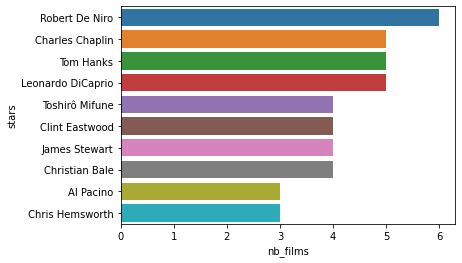

In [33]:
#Affichages des tops 
user_choice=int(input( """Si vous souhaitez conaitre : 
    - Les STARS les plus présents dans le top 250 -  Tapez 1
    - Les DIRECTORS les plus présents dans le top 250 - Tapez 2
    - Les GENRES de film les plus dans le top 250 - Tapez 3
"""))
result=top_5(user_choice, final_df2)

# Affichage des genres les plus représentés

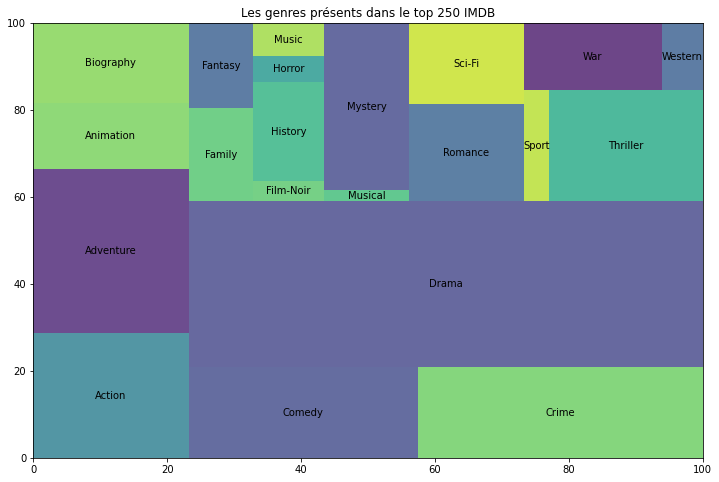

In [6]:
graph_square(final_df2)

# Matrice de corrélation et quelques graphiques de visualisation

<AxesSubplot:title={'center':'Matrice de Corrélation'}>

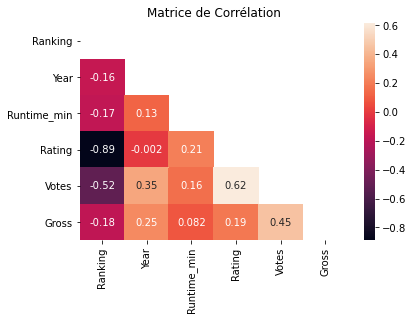

In [7]:
corr_matrice(final_df)

<AxesSubplot:title={'center':'Evolution des notes vs rating'}, xlabel='Votes', ylabel='Rating'>

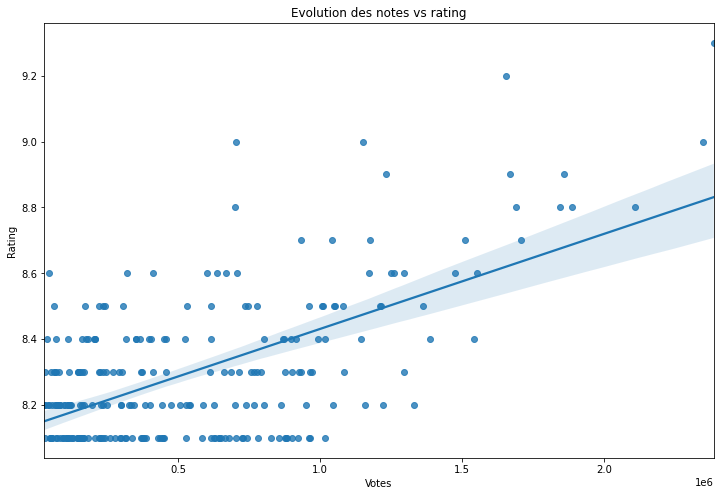

In [8]:
votes_vs_Rating(final_df2)

In [9]:
#creation de categorie 
total_by_decades=regroup_by_decade(final_df)

In [10]:
total_by_decades

,Decenie,Number_of_movies,Average_nb_of_votes,Average_ratings
0,"(1920, 1930]",6,92816.67,8.20
1,"(1930, 1940]",8,171326.38,8.26
2,"(1940, 1950]",11,221885.18,8.30
3,"(1950, 1960]",22,228092.45,8.29
4,"(1960, 1970]",16,234403.56,8.29
5,"(1970, 1980]",23,578450.39,8.35
6,"(1980, 1990]",25,480896.20,8.27
7,"(1990, 2000]",44,896102.32,8.38
8,"(2000, 2010]",48,754677.04,8.30
9,"(2010, 2020]",47,494359.23,8.24


<AxesSubplot:title={'center':'Nomre de films par décénie'}, xlabel='Number_of_movies', ylabel='Decenie'>

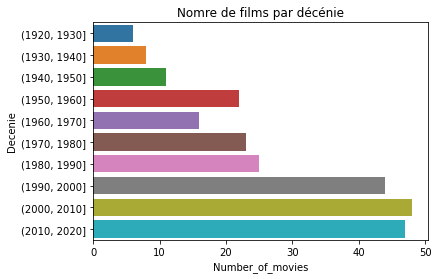

In [11]:
decades_movies(total_by_decades)